<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#elspot" data-toc-modified-id="elspot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>elspot</a></span></li><li><span><a href="#NAB" data-toc-modified-id="NAB-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>NAB</a></span></li><li><span><a href="#Figure-4" data-toc-modified-id="Figure-4-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Figure 4</a></span></li><li><span><a href="#Figure-5" data-toc-modified-id="Figure-5-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Figure 5</a></span></li></ul></li><li><span><a href="#algorithms" data-toc-modified-id="algorithms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>algorithms</a></span><ul class="toc-item"><li><span><a href="#figure-6" data-toc-modified-id="figure-6-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>figure 6</a></span></li><li><span><a href="#Figure-7" data-toc-modified-id="Figure-7-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Figure 7</a></span><ul class="toc-item"><li><span><a href="#separately-for-KMeans" data-toc-modified-id="separately-for-KMeans-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>separately for KMeans</a></span></li><li><span><a href="#other-methods" data-toc-modified-id="other-methods-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>other methods</a></span></li></ul></li><li><span><a href="#Table-3" data-toc-modified-id="Table-3-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Table 3</a></span></li><li><span><a href="#table-4" data-toc-modified-id="table-4-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>table 4</a></span></li><li><span><a href="#table-5" data-toc-modified-id="table-5-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>table 5</a></span></li><li><span><a href="#Figure-9" data-toc-modified-id="Figure-9-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Figure 9</a></span></li></ul></li></ul></div>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

sns.set()
sns.set_style(style='white') 

from tqdm.auto import tqdm

In [4]:
import json

## Data

### elspot

We collected NordPool’s Elspot data from January 2016 to
September 2018

which contains hourly spot prices, the vol-
ume of electricity (demand and production), price area, and
timestamp

currency? just use EUR

https://www.nordpoolgroup.com/historical-market-data/

In [5]:
prices = []
for year in [2016, 2017, 2018]:
    prices.append(pd.read_csv(f'price{year}.csv', header=2, decimal=","))
prices = pd.concat(prices)

In [6]:
volumes = []
for year in [2016, 2017, 2018]:
    volumes.append(pd.read_csv(f'volume{year}.csv', header=3, decimal=","))
volumes = pd.concat(volumes)

In [7]:
prices = prices.reset_index(drop=True)

In [8]:
prices.shape, volumes.shape

((26307, 20), (26307, 35))

In [9]:
prices.head()

,Unnamed: 0,Hours,SYS,SE1,SE2,SE3,SE4,FI,DK1,DK2,Oslo,Kr.sand,Bergen,Molde,Tr.heim,Tromsø,EE,LV,LT,FRE
0,01-01-2016,00 - 01,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,28.11,28.11,NaN
1,01-01-2016,01 - 02,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,NaN
2,01-01-2016,02 - 03,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,NaN
3,01-01-2016,03 - 04,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,NaN
4,01-01-2016,04 - 05,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,NaN


In [10]:
volumes.head()

,Unnamed: 0,Hours,Turnover at system price,NO1 Buy,NO1 Sell,NO2 Buy,NO2 Sell,NO3 Buy,NO3 Sell,NO4 Buy,...,DK1 Buy,DK1 Sell,DK2 Buy,DK2 Sell,EE Buy,EE Sell,LV Buy,LV Sell,LT Buy,LT Sell
0,01-01-2016,00 - 01,40180.1,4187.9,1451.4,4564.4,7863.9,2355.9,1485.3,1827.5,...,1295.7,1417.7,1988.5,824.6,729.2,838.4,743.6,435.6,931.9,610.9
1,01-01-2016,01 - 02,39293.8,4073.5,1451.8,4517.4,7573.3,2331.1,1383.4,1813.0,...,1238.4,1447.8,1945.9,807.2,694.1,834.2,708.3,434.3,884.8,559.3
2,01-01-2016,02 - 03,38513.8,3988.8,1445.7,4467.1,7195.2,2311.4,1349.6,1797.6,...,1174.7,1483.5,1895.1,794.4,681.6,835.0,680.8,432.6,850.4,573.1
3,01-01-2016,03 - 04,38126.8,3944.6,1441.5,4450.5,6963.3,2293.1,1333.7,1785.4,...,1115.1,1561.0,1847.0,817.5,675.7,832.8,659.6,432.1,939.1,584.3
4,01-01-2016,04 - 05,37894.3,3946.1,1451.0,4429.1,6864.6,2284.8,1319.2,1776.0,...,1089.2,1587.7,1714.7,844.6,678.0,832.4,659.6,438.9,942.1,585.3


In [11]:
print(prices.info(), volumes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26307 non-null  object 
 1   Hours       26307 non-null  object 
 2   SYS         26304 non-null  float64
 3   SE1         26304 non-null  float64
 4   SE2         26304 non-null  float64
 5   SE3         26304 non-null  float64
 6   SE4         26304 non-null  float64
 7   FI          26304 non-null  float64
 8   DK1         26304 non-null  float64
 9   DK2         26304 non-null  float64
 10  Oslo        26304 non-null  float64
 11  Kr.sand     26304 non-null  float64
 12  Bergen      26304 non-null  float64
 13  Molde       26304 non-null  float64
 14  Tr.heim     26304 non-null  float64
 15  Tromsø      26304 non-null  float64
 16  EE          26304 non-null  float64
 17  LV          26304 non-null  float64
 18  LT          26304 non-null  float64
 19  FRE         978 non-null 

### NAB

downloading the data from https://github.com/numenta/NAB/tree/master/data

* machine_temperature_system_failure.csv
* speed7578.csv
* ambient_temperature_system_failure.csv
* nyc_taxi.csv

In [12]:
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_7578.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/labels/combined_windows.json

In [13]:
with open('combined_windows.json', 'r') as f:
    labels = json.load(f)

In [14]:
mt = pd.read_csv('machine_temperature_system_failure.csv', parse_dates=[0])
sp = pd.read_csv('speed_7578.csv', parse_dates=[0])
at = pd.read_csv('ambient_temperature_system_failure.csv', parse_dates=[0])
nt = pd.read_csv('nyc_taxi.csv', parse_dates=[0])

In [15]:
mt.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [16]:
sp.head()

,timestamp,value
0,2015-09-08 11:39:00,73
1,2015-09-08 11:44:00,62
2,2015-09-08 11:59:00,66
3,2015-09-08 12:19:00,69
4,2015-09-08 12:24:00,65


In [17]:
at.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


In [18]:
nt.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


### Figure 4

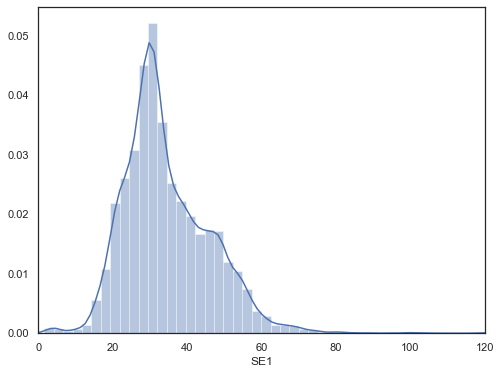

In [19]:
fig,axs=plt.subplots(figsize=(8, 6))
sns.set()
sns.distplot(prices['SE1'], bins=100, kde=True)
plt.ylabel('')
plt.xlim(0, 120);

### Figure 5

[Text(0.5, 1.0, 'Dataset: nyc taxi')]

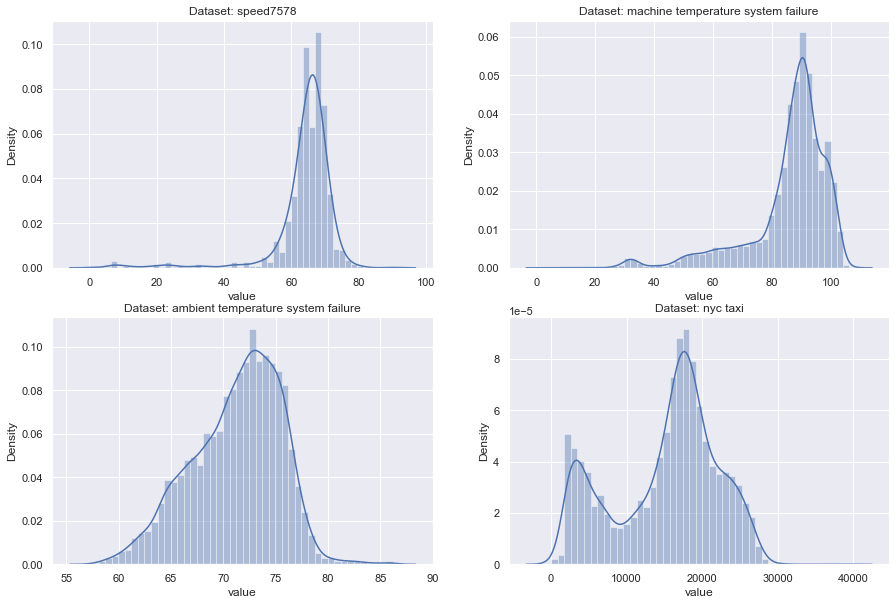

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15,10))

#create boxplot in each subplot
sns.distplot(sp['value'], ax=axes[0,0]).set(title='Dataset: speed7578')
sns.distplot(mt['value'], ax=axes[0,1]).set(title='Dataset: machine temperature system failure')
sns.distplot(at['value'], ax=axes[1,0]).set(title='Dataset: ambient temperature system failure')
sns.distplot(nt['value'], ax=axes[1,1]).set(title='Dataset: nyc taxi')

> map labels

In [21]:
obj2name = [
    (mt, 'realKnownCause/machine_temperature_system_failure.csv'),
    (sp, 'realTraffic/speed_7578.csv'),
    (at, 'realKnownCause/ambient_temperature_system_failure.csv'),
    (nt, 'realKnownCause/nyc_taxi.csv'),
]

In [22]:
for ds_obj, dataset in obj2name:
    ds_obj['anomaly'] = 0

    for w in labels[dataset]:
        anomalies_mask = (ds_obj['timestamp'] >= w[0]) & (ds_obj['timestamp'] <= w[1])
        ds_obj.loc[anomalies_mask, 'anomaly'] = 1

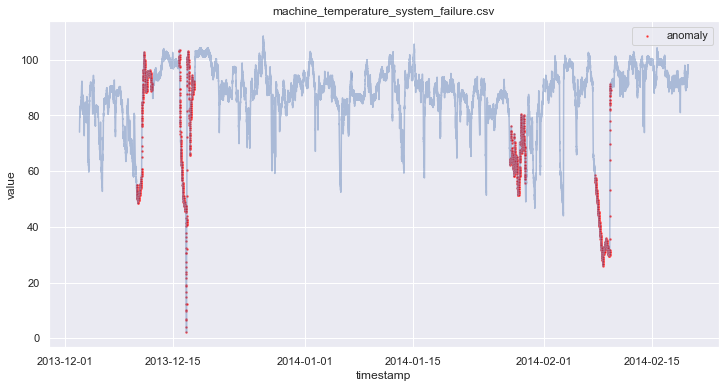

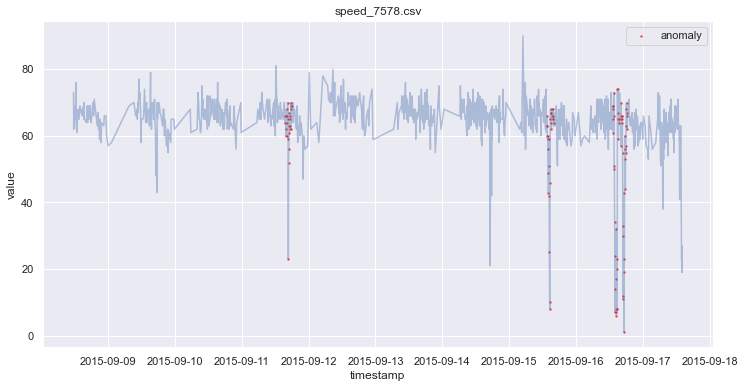

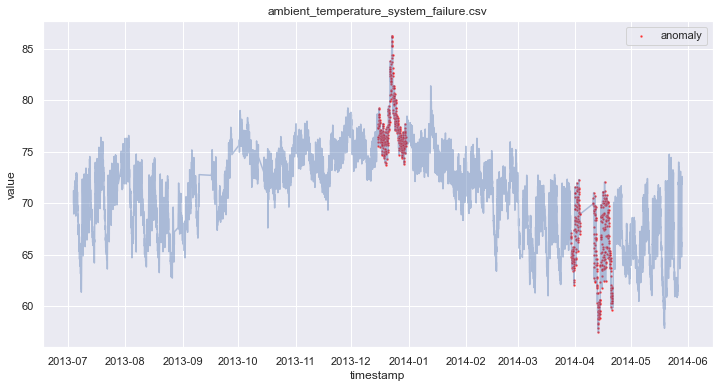

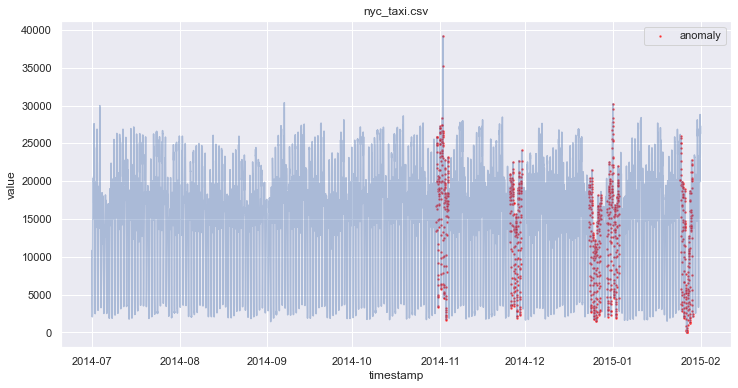

In [23]:
for ds_obj, dataset in obj2name:
    fig,axs=plt.subplots(figsize=(12, 6))
    sns.lineplot(x='timestamp', y='value', data=ds_obj, alpha=0.4)
    sns.scatterplot(x='timestamp', y='value', data=ds_obj[ds_obj['anomaly']==1],
                    color='red', label='anomaly', alpha=0.8, s=6)
#     plt.title('Machine temperature system failure anomalies');
    plt.title(dataset.split('/')[-1])
    plt.show()

## algorithms

need to repro
* Table 3 for elspot
* Table 4 and Table 5

### figure 6

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from doubt import QuantileRegressionForest as QRF
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import IsolationForest

from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors

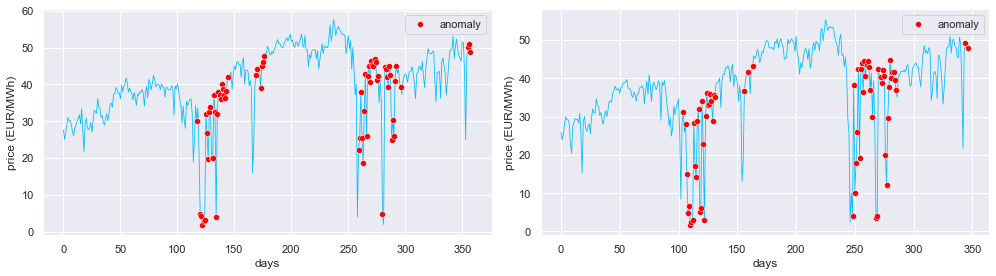

In [25]:
fig,axs=plt.subplots(figsize=(14, 4))

for i, hour in enumerate(['00 - 01', '02 - 03']):
    target = 'SE1_D'
    c = 'SE1'
    X = prices[prices['Hours']==hour][[c]].copy().reset_index(drop=True)
    # X['day'] = X.index
    X[target] = X[c].diff(1)
    for l in range(1, 11):
        colname = target+'_'+str(l)
        X[colname] = X[target].shift(l)
    X = X.dropna()
    X_train, X_test, y_train, y_test = train_test_split(
        X.drop(columns=[c]), X[c],
        test_size=0.33, random_state=42, shuffle=False,
    )
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    model = IsolationForest()
    model.fit(X_train, y_train);
    X_test['pred'] = model.predict(X_test)
    X_test['day'] = X_test.index
    X_test[c] = y_test
    
    plt.subplot(1, 2, i+1)
    sns.lineplot(x='day', y=c, data=X_test, color='deepskyblue', lw=0.8)
    plt.ylabel('price (EUR/MWh)')
    plt.xlabel('days')
    sns.scatterplot(x='day', y=c, data=X_test[X_test.pred == -1], label='anomaly', color='red', zorder=228)
fig.tight_layout()

### Figure 7

#### separately for KMeans

https://www.datatechnotes.com/2020/05/anomaly-detection-with-kmeans-in-python.html

In [26]:
model = KMeans(n_clusters=1)

In [27]:
target = 'SE1_D'
c = 'SE1'
X = prices[prices['Hours']==hour][[c]].copy().reset_index(drop=True)
# X['day'] = X.index
X[target] = X[c].diff(1)
for l in range(1, 11):
    colname = target+'_'+str(l)
    X[colname] = X[target].shift(l)
X = X.dropna()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(columns=[c]), X[c],
    test_size=0.33, random_state=42, shuffle=False,
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

model.fit(X=X_train, y=y_train);

In [29]:
center = model.cluster_centers_[0]

In [30]:
distance = np.sqrt(np.sum((X_test.values - center)**2, axis=1))

In [31]:
order_index = np.argsort(distance, axis = 0)
indexes = order_index[-40:]

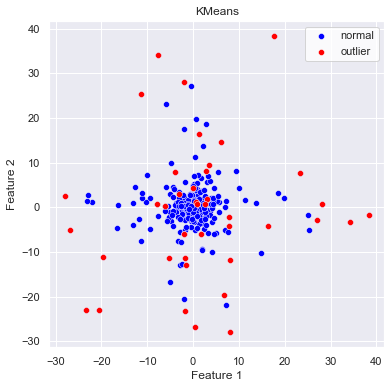

In [32]:
fig,ax = plt.subplots(figsize=(6, 6))
sns.set_style(style='white') 
sns.scatterplot(x='SE1_D_1', y='SE1_D_9', data=X_test, color='blue', label='normal')
sns.scatterplot(x='SE1_D_1', y='SE1_D_9', color='red', data=X_test.iloc[indexes], label='outlier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans')
plt.legend()
plt.show()

#### other methods

In [33]:
methods = {
    'iForest': IsolationForest(),
    'k-NN': IsolationForest(),
    'OCSVM': OneClassSVM(),
    'LOF': LocalOutlierFactor(novelty=True),
}

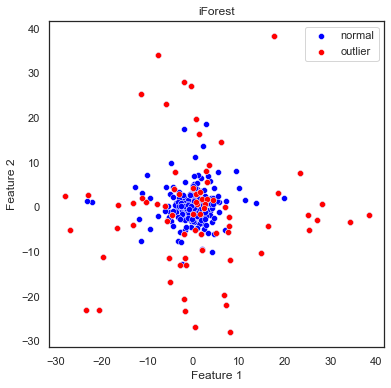

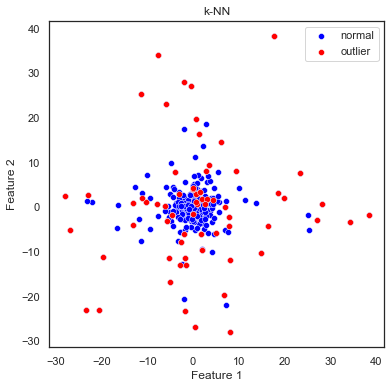

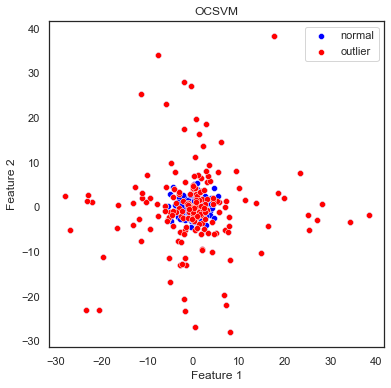

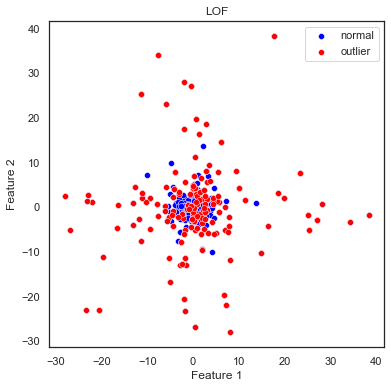

In [34]:
for i, (method_name, model) in enumerate(methods.items()):
    fig,ax = plt.subplots(figsize=(6, 6))
    X_train, X_test, y_train, y_test = train_test_split(
        X.drop(columns=[c]), X[c],
        test_size=0.33, random_state=42, shuffle=False,
    )
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    
    model.fit(X=X_train, y=y_train);

    X_test['pred'] = model.predict(X_test)
    X_test['day'] = X_test.index
    X_test[c] = y_test
    
    sns.set_style(style='white') 
    sns.scatterplot(x='SE1_D_1', y='SE1_D_9', data=X_test, color='blue', label='normal')
    sns.scatterplot(x='SE1_D_1', y='SE1_D_9', color='red', data=X_test[X_test.pred == -1], label='outlier')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(method_name)
    plt.legend()
    plt.show()

### Table 3

In [35]:
target = 'SE1'
c = 'SE1'
hour='00 - 01'
X = prices[prices['Hours']==hour][[c]].copy().reset_index(drop=True)
# X['day'] = X.index
X[target] = X[c].diff(1)
for l in range(1, 11):
    colname = target+'_'+str(l)
    X[colname] = X[target].shift(l)
X = X.dropna()

In [36]:
methods = {
    'QRF': QRF(max_leaf_nodes=8),
    'GBR': GradientBoostingRegressor(criterion='squared_error'),
    'ETR': ExtraTreesRegressor(criterion='squared_error'),
}

In [37]:
%%capture
result_t3 = []

for method_name, model in methods.items():
    print(method_name)
    X_train, X_test, y_train, y_test = train_test_split(
        X, X[target],
        test_size=0.33, random_state=42,
    )
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    

    if method_name == 'QRF':
        model.fit(X=X_train.values, y=y_train.values);
        y_pred = model.predict(X_test.values, uncertainty=0.05)[0]
    elif method_name == 'ETR':
        model.fit(X=X_train.values, y=y_train.values);
        y_pred = model.predict(X_test.values)
    else:
        print(X_train.columns, X_train.shape)
        model.fit(X=X_train, y=y_train);
        print('trained')
        y_pred = model.predict(X_test)

    MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    r = r2_score(y_test, y_pred)

    result_t3.append([method_name, 100*MSE, 10*MAE, 10*RMSE, r])
        
result_t3 = pd.DataFrame(result_t3, columns=['Method', 'MSE', 'MAE', 'RMSE', 'R-score'])        

In [38]:
result_t3

,Method,MSE,MAE,RMSE,R-score
0,QRF,51.968484,4.698065,7.208917,0.971713
1,GBR,8.889235,0.904918,2.981482,0.995162
2,ETR,1.105280,0.275471,1.051323,0.999398


### table 4

In [39]:
# https://stackoverflow.com/a/31351145
def tpr_tnr(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    # https://en.wikipedia.org/wiki/Sensitivity_and_specificity 
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    return TPR, TNR, FPR

In [40]:
timestamp = 'timestamp'
target = 'anomaly'
current_value = 'value'

In [41]:
methods = {
    'kmeans': KMeans(),
    'iForest': IsolationForest(),
    'OCSVM': OneClassSVM(),
    'k-NN': KNeighborsClassifier(),
    'LOF': LocalOutlierFactor(novelty=True),
}
datasets = {
    'speed7578': sp,
    'nyc taxi': nt,
    'ambient temp': at,
    'machine temp': mt,
}

In [42]:
result_t4 = []
for ds_name, X in datasets.items():
    for method_name, model in methods.items():
        X_train, X_test, y_train, y_test = train_test_split(
            X.drop(columns=[target, timestamp]), X[target],
            test_size=0.33, random_state=42,
            stratify=X[target],
        )
        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        
        model.fit(X=X_train, y=y_train);
        y_pred = model.predict(X_test)
        TPR, TNR, FPR = tpr_tnr(y_actual=y_test, y_hat=y_pred)
        AUC = roc_auc_score(y_test, y_pred)
        result_t4.append([ds_name, method_name, TPR, TNR, FPR, AUC])
        
result_t4 = pd.DataFrame(result_t4, columns=['Data', 'Method', 'TPR', 'TNR', 'FPR', 'AUC'])        

In [43]:
result_t4.loc[result_t4['Data'] == 'speed7578']

,Data,Method,TPR,TNR,FPR,AUC
0,speed7578,kmeans,0.800000,1.000000,0.000000,0.576387
1,speed7578,iForest,1.000000,0.000000,1.000000,0.352348
2,speed7578,OCSVM,1.000000,0.000000,1.000000,0.400095
3,speed7578,k-NN,0.210526,0.997006,0.002994,0.603766
4,speed7578,LOF,1.000000,0.000000,1.000000,0.467145


In [44]:
result_t4.loc[result_t4['Data'] == 'nyc taxi']

,Data,Method,TPR,TNR,FPR,AUC
5,nyc taxi,kmeans,0.441441,0.406750,0.593250,0.518118
6,nyc taxi,iForest,1.000000,0.000000,1.000000,0.446262
7,nyc taxi,OCSVM,1.000000,0.000000,1.000000,0.486979
8,nyc taxi,k-NN,0.023392,0.992167,0.007833,0.507779
9,nyc taxi,LOF,1.000000,0.000000,1.000000,0.495940


In [45]:
result_t4.loc[result_t4['Data'] == 'ambient temp']

,Data,Method,TPR,TNR,FPR,AUC
10,ambient temp,kmeans,0.540984,0.448229,0.551771,0.589369
11,ambient temp,iForest,1.000000,0.000000,1.000000,0.309534
12,ambient temp,OCSVM,1.000000,0.000000,1.000000,0.333439
13,ambient temp,k-NN,0.191667,0.979620,0.020380,0.585643
14,ambient temp,LOF,1.000000,0.000000,1.000000,0.492130


In [46]:
result_t4.loc[result_t4['Data'] == 'machine temp']

,Data,Method,TPR,TNR,FPR,AUC
15,machine temp,kmeans,0.577273,0.894049,0.105951,0.590842
16,machine temp,iForest,1.000000,0.000000,1.000000,0.229862
17,machine temp,OCSVM,1.000000,0.000000,1.000000,0.327845
18,machine temp,k-NN,0.431242,0.982050,0.017950,0.706646
19,machine temp,LOF,1.000000,0.000000,1.000000,0.494660


### table 5

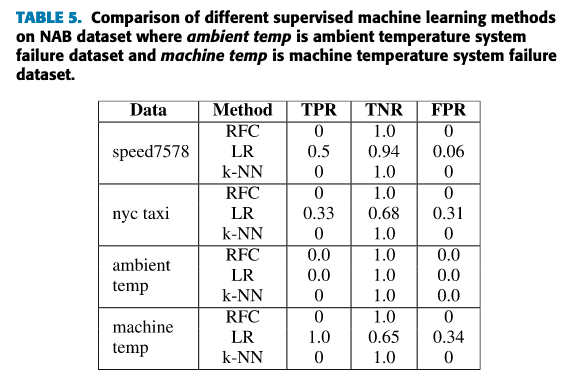

Logistic regression (LR) captured some outliers, but the Random
Forest classifier (RFC) and k-NN could not classify outliers
correctly in the test sets.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc

In [48]:
timestamp = 'timestamp'
target = 'anomaly'
current_value = 'value'

In [49]:
X = mt.copy()

> example for 1 model

In [50]:
model = RandomForestClassifier(random_state=123)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(columns=[target, timestamp]), X[target],
    test_size=0.33, random_state=42,
    stratify=X[target],
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [52]:
y_test.value_counts()/len(y_test)

0    0.9
1    0.1
Name: anomaly, dtype: float64

In [53]:
model.fit(X_train, y_train);

In [54]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # proba of the positive class

In [55]:
TPR, TNR, FPR = tpr_tnr(y_actual=y_test, y_hat=y_pred)
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

> Table 5

In [56]:
methods = {
    'RFC': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'k-NN': KNeighborsClassifier(),
}
datasets = {
    'speed7578': sp,
    'nyc taxi': nt,
    'ambient temp': at,
    'machine temp': mt,
}

In [65]:
result_t5 = []
for ds_name, X in datasets.items():
    for method_name, model in methods.items():
        X_train, X_test, y_train, y_test = train_test_split(
            X.drop(columns=[target, timestamp]), X[target],
            test_size=0.33, random_state=42,
            stratify=X[target],
        )
        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        
        model.fit(X=X_train, y=y_train);
        y_pred = model.predict(X_test)
        y_pred_probs = model.predict_proba(X_test)[:, 1]

        TPR, TNR, FPR = tpr_tnr(y_actual=y_test, y_hat=y_pred)
        precision, recall, _ = precision_recall_curve(y_test, y_pred_probs)
        AUC = auc(recall, precision)
        result_t5.append([ds_name, method_name, TPR, TNR, FPR, AUC])
        
result_t5 = pd.DataFrame(result_t5, columns=['Data', 'Method', 'TPR', 'TNR', 
                                             'FPR', 'AUC-PR'])

In [66]:
result_t5

,Data,Method,TPR,TNR,FPR,AUC-PR
0,speed7578,RFC,0.184211,0.997006,0.002994,0.416578
1,speed7578,LR,0.210526,0.997006,0.002994,0.462437
2,speed7578,k-NN,0.210526,0.997006,0.002994,0.441443
3,nyc taxi,RFC,0.114035,0.919713,0.080287,0.125443
4,nyc taxi,LR,0.000000,1.000000,0.000000,0.151800
5,nyc taxi,k-NN,0.023392,0.992167,0.007833,0.134270
6,ambient temp,RFC,0.266667,0.919407,0.080593,0.293714
7,ambient temp,LR,0.000000,1.000000,0.000000,0.301980
8,ambient temp,k-NN,0.191667,0.979620,0.020380,0.333552
9,machine temp,RFC,0.445928,0.937101,0.062899,0.521775


/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/Users/th/Documents/hse_nis/env/lib/python3.8/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


### Figure 9

In [175]:
target = 'SE1'
c = 'SE1'
hour='00 - 01'
X = prices[prices['Hours']==hour][[c]].copy().reset_index(drop=True)
# X['day'] = X.index
# X[target] = X[c].diff(1)
for l in range(1, 11):
    colname = target+'_'+str(l)
    X[colname] = X[target].shift(l)
X = X.dropna()

In [176]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(target, axis=1), X[target],
    test_size=0.33, random_state=42, shuffle=False,
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [177]:
model = QRF(max_leaf_nodes=8)

In [178]:
model.fit(X=X_train.values, y=y_train.values);
y_pred = model.predict(X_test.values, uncertainty=0.1)

In [179]:
X_test['pred'] = y_pred[0]
X_test['day'] = X_test.index
X_test['SE1'] = y_test

In [205]:
X_test = X_test[:60]
ci1 = y_pred[1][:60, 0]
ci2 = y_pred[1][:60, 1]
X_test['outlier'] = 0
X_test['ci1'] = ci1
X_test['ci2'] = ci2

mask = (X_test['SE1'].values > ci2) | (X_test['SE1'].values < ci1)
X_test.loc[mask, 'outlier'] = 1

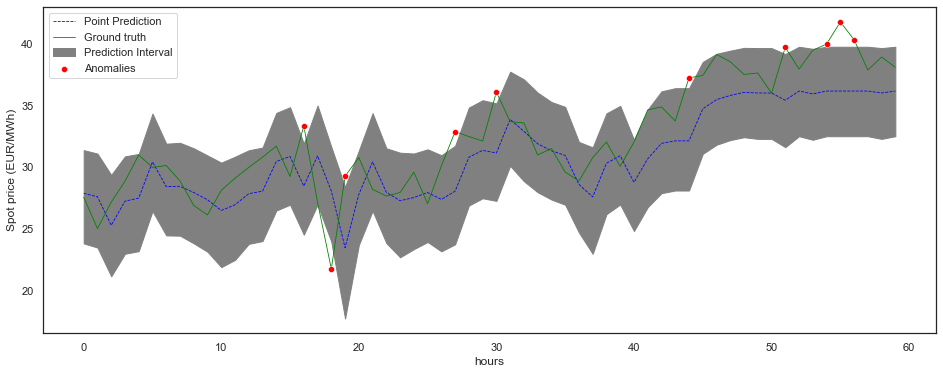

In [215]:
fig,axs=plt.subplots(figsize=(16, 6))
sns.lineplot(x='day', y='pred', data=X_test, color='blue', lw=0.8, ls='dashed', label='Point Prediction')
sns.lineplot(x='day', y='SE1', data=X_test, color='green', lw=0.8, label='Ground truth')
plt.ylabel('Spot price (EUR/MWh)')
plt.xlabel('hours')
plt.fill_between(x=X_test['day'], y1=ci1, y2=ci2, color='grey', label='Prediction Interval')
sns.scatterplot(x='day', y='SE1', data=X_test[X_test.outlier == 1], label='Anomalies', color='red', zorder=228);

In [73]:
%%capture
result_t3 = []

for method_name, model in methods.items():
    print(method_name)
    X_train, X_test, y_train, y_test = train_test_split(
        X, X[target],
        test_size=0.33, random_state=42,
    )
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    

    if method_name == 'QRF':
        model.fit(X=X_train.values, y=y_train.values);
        y_pred = model.predict(X_test.values, uncertainty=0.05)[0]
    elif method_name == 'ETR':
        model.fit(X=X_train.values, y=y_train.values);
        y_pred = model.predict(X_test.values)
    else:
        print(X_train.columns, X_train.shape)
        model.fit(X=X_train, y=y_train);
        print('trained')
        y_pred = model.predict(X_test)

    MSE = mean_squared_error(y_true=y_test, y_pred=y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    RMSE = mean_squared_error(y_test, y_pred, squared=False)
    r = r2_score(y_test, y_pred)

    result_t3.append([method_name, 100*MSE, 10*MAE, 10*RMSE, r])
        
result_t3 = pd.DataFrame(result_t3, columns=['Method', 'MSE', 'MAE', 'RMSE', 'R-score'])        